In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")
from datetime import datetime
from datetime import timedelta
import math
import random 
import timeit
from dateutil import parser

In [155]:
brm = pd.read_csv("../resources/bremen.csv")

In [156]:
frb = pd.read_csv("../resources/freiburg.csv")

Calculate the revenue by dividing by 30 (minutes). For this calculation we have to adjust the time column.

In [157]:
brm["minutes"]=brm["trip_duration"].map(lambda x:int(x[10:12])+int(x[7:9])*60)
brm["revenue"]=(brm["minutes"]/30).apply(np.ceil)
frb["minutes"]=frb["trip_duration"].map(lambda x:int(x[10:12])+int(x[7:9])*60)
frb["revenue"]=(frb["minutes"]/30).apply(np.ceil)

Show the new table with the calculated revenue.

In [158]:
brm
frb

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,minutes,revenue
0,2019-05-06,14:22:00,32560,freiburg,0 days 00:07:00.000000000,47.993178,7.795708,47.994027,7.796084,7,1.0
1,2019-05-07,10:42:00,32560,freiburg,0 days 00:07:00.000000000,47.994191,7.796853,47.991960,7.797405,7,1.0
2,2019-05-07,11:02:00,32560,freiburg,0 days 00:09:00.000000000,47.992044,7.797352,47.992000,7.797478,9,1.0
3,2019-05-07,12:48:00,32560,freiburg,0 days 00:23:00.000000000,47.992107,7.797499,47.994271,7.796668,23,1.0
4,2019-05-08,09:00:00,32560,freiburg,0 days 00:03:00.000000000,47.994178,7.796721,47.992307,7.796708,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...
127524,2020-01-20,08:14:00,32999,freiburg,0 days 00:12:00.000000000,48.012050,7.854987,47.994729,7.846862,12,1.0
127525,2020-01-20,09:10:00,32999,freiburg,0 days 00:04:00.000000000,47.996100,7.846160,48.000858,7.849587,4,1.0
127526,2020-01-20,10:03:00,32999,freiburg,0 days 00:24:00.000000000,48.000858,7.849587,48.002664,7.851253,24,1.0
127527,2020-01-20,13:55:00,32999,freiburg,0 days 00:07:00.000000000,48.002664,7.851253,47.997430,7.842500,7,1.0


Groups by day and sums up the revenue per day.

In [159]:
brm_revenue_daily=brm.groupby(["day"]).agg({"revenue":"sum"})
frb_revenue_daily=frb.groupby(["day"]).agg({"revenue":"sum"})

Groups by hour and sums up the revenue per hour. Before that the format of time must be changed in order to show only the current hour.

In [160]:
brm["hour"] = brm["time"].str[:-6]
frb["hour"] = frb["time"].str[:-6]
brm_revenue_hourly=brm.groupby(["day","hour"]).agg({"revenue":"sum"})
frb_revenue_hourly=frb.groupby(["day","hour"]).agg({"revenue":"sum"})

Shows the revenue per day.

In [161]:
print (brm_revenue_daily)
print (frb_revenue_daily)

            revenue
day                
2019-01-20    132.0
2019-01-21    184.0
2019-01-22    189.0
2019-01-23    169.0
2019-01-24    182.0
...             ...
2020-01-16    461.0
2020-01-17    547.0
2020-01-18    394.0
2020-01-19    381.0
2020-01-20    436.0

[363 rows x 1 columns]
            revenue
day                
2019-05-06      1.0
2019-05-07      3.0
2019-05-08      5.0
2019-05-09      3.0
2019-05-10      2.0
...             ...
2020-01-16   1044.0
2020-01-17    754.0
2020-01-18    584.0
2020-01-19    397.0
2020-01-20    877.0

[257 rows x 1 columns]


Shows the revenue per hour.

In [162]:
print (brm_revenue_hourly)
print (frb_revenue_hourly)

                 revenue
day        hour         
2019-01-20 00        3.0
           01        3.0
           02        5.0
           03        2.0
           05        3.0
...                  ...
2020-01-20 19       32.0
           20       24.0
           21        9.0
           22       15.0
           23        3.0

[8409 rows x 1 columns]
                 revenue
day        hour         
2019-05-06 14        1.0
2019-05-07 10        1.0
           11        1.0
           12        1.0
2019-05-08 09        1.0
...                  ...
2020-01-20 19       45.0
           20       18.0
           21       17.0
           22       26.0
           23        8.0

[5819 rows x 1 columns]


Splitting the data set into seasons.

In [163]:
frb_spring =  frb[(frb['day'] >= "2019-03-01") & (frb['day'] <= "2019-05-31")]
frb_summer =  frb[(frb['day'] >= "2019-06-01") & (frb['day'] <= "2019-09-31")] 
frb_fall   =  frb[(frb['day'] >= "2019-09-01") & (frb['day'] <= "2019-11-30")]
frb_winter =  frb[(frb['day'] >= "2019-12-01") & (frb['day'] <= "2020-01-20")]

brm_spring =  brm[(brm['day'] >= "2019-03-01") & (brm['day'] <= "2019-05-31")]
brm_summer =  brm[(brm['day'] >= "2019-06-01") & (brm['day'] <= "2019-09-31")] 
brm_fall   =  brm[(brm['day'] >= "2019-09-01") & (brm['day'] <= "2019-11-30")]
brm_winter =  brm[(brm['day'] >= "2019-12-01") & (brm['day'] <= "2020-01-20")]

Group our hourly revenue into seasons.

In [164]:
brm_revenue_hourly_spring=brm_spring.groupby(["day","hour"]).agg({"revenue":"sum"})
brm_revenue_hourly_summer=brm_summer.groupby(["day","hour"]).agg({"revenue":"sum"})
brm_revenue_hourly_fall=brm_fall.groupby(["day","hour"]).agg({"revenue":"sum"})
brm_revenue_hourly_winter=brm_winter.groupby(["day","hour"]).agg({"revenue":"sum"})

frb_revenue_hourly_spring=frb_spring.groupby(["day","hour"]).agg({"revenue":"sum"})
frb_revenue_hourly_summer=frb_summer.groupby(["day","hour"]).agg({"revenue":"sum"})
frb_revenue_hourly_fall=frb_fall.groupby(["day","hour"]).agg({"revenue":"sum"})
frb_revenue_hourly_winter=frb_winter.groupby(["day","hour"]).agg({"revenue":"sum"})

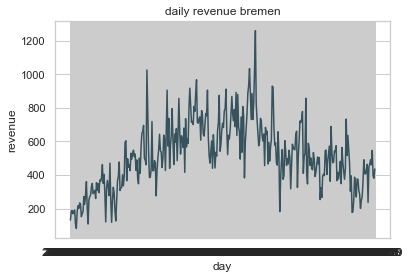

<Figure size 1296x432 with 0 Axes>

In [165]:
plt.plot(brm_revenue_daily)
plt.xlabel('day')
plt.ylabel('revenue')
plt.title("daily revenue bremen")

plt.figure(figsize = (18,6))

plt.show()

In [166]:
def revenue_bar(brm_revenue_daily,frb_revenue_daily):
    labels=['max','min','mean']
    data=[[brm_revenue_daily["revenue"].max(),brm_revenue_daily["revenue"].min()
           ,brm_revenue_daily["revenue"].mean()],[frb_revenue_daily["revenue"].max(),
            frb_revenue_daily["revenue"].min(),frb_revenue_daily["revenue"].mean()]]                                                
    data[0]=[1260,82,517.18]
    data[1]=[1272,1,620.97]
    x=np.arange(len(labels)) 
    fig, ax = plt.subplots()
    ax.set_ylabel('Revenue')
    ax.set_title('Daily revenue in comparison ')
    ax.set_xticks(x)
    ax.set_xticklabels(labels) 
    width = 0.5                                                  
    rects1 = ax.bar(x+0.5, data[0], width,color='b', label='Bremen')
    rects2 = ax.bar(x, data[1], width, color='g',label='Freiburg')
    
    def autolabel(rects):
       for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    ax.legend()
    plt.show()

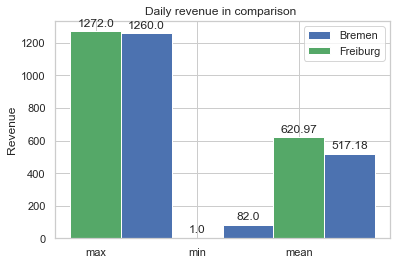

In [167]:
revenue_bar(brm_revenue_daily,frb_revenue_daily)

The average revenue of Freiburg is way higher than in Bremen.

A explanation for this result might be that in Freiburg there is a higher percentage of students. In Freiburg there are approx. 10,44 % students. In comparison in Bremen there are only 3,33% students. We guess that younger people especially students use bikes more often than older people. 